<a href="https://colab.research.google.com/github/Purnata26/scikit/blob/master/nurse_label_purno_user4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
train_data=pd.read_csv('/content/drive/My Drive/Nurse/Field/field_label_train.csv')
train_data

,user_id,activity_type_id,start,finish
0,38,1,2018-11-21 14:15:29 +0900,2018-11-21 14:15:31 +0900
1,51,1,2018-11-21 14:15:35 +0900,2018-11-21 14:15:38 +0900
2,51,3,2018-11-21 14:31:31 +0900,2018-11-21 14:31:32 +0900
3,51,5,2018-11-21 14:31:52 +0900,2018-11-21 14:31:54 +0900
4,18,5,2018-11-22 19:17:46 +0900,2018-11-22 19:19:29 +0900
...,...,...,...,...
1472,38,12,2019-01-24 16:44:41 +0900,2019-01-24 16:44:42 +0900
1473,51,12,2019-01-24 16:48:52 +0900,2019-01-24 16:48:51 +0900
1474,4,12,2019-01-24 16:49:17 +0900,2019-01-24 16:49:18 +0900
1475,4,7,2019-01-24 18:24:41 +0900,2019-01-24 18:32:05 +0900


In [3]:
train_data=train_data.loc[(train_data['user_id']==4)]
train_data

,user_id,activity_type_id,start,finish
12,4,1,2018-11-22 21:36:22 +0900,2018-11-22 21:36:44 +0900
14,4,1,2018-11-22 21:41:04 +0900,2018-11-22 21:41:23 +0900
28,4,1,2018-11-22 23:03:52 +0900,2018-11-22 23:04:32 +0900
29,4,1,2018-11-22 23:06:56 +0900,2018-11-22 23:07:19 +0900
30,4,7,2018-11-22 23:34:42 +0900,2018-11-22 23:35:03 +0900
...,...,...,...,...
1369,4,5,2018-12-27 12:17:46 +0900,2018-12-27 12:23:41 +0900
1462,4,4,2018-12-31 20:48:04 +0900,2018-12-31 22:31:58 +0900
1474,4,12,2019-01-24 16:49:17 +0900,2019-01-24 16:49:18 +0900
1475,4,7,2019-01-24 18:24:41 +0900,2019-01-24 18:32:05 +0900


In [4]:
train_data=train_data.loc[(train_data['start']<=train_data['finish'])]
train_data=train_data.drop_duplicates(subset ="start" )
train_data=train_data.drop_duplicates(subset ="finish" )
train_data

,user_id,activity_type_id,start,finish
12,4,1,2018-11-22 21:36:22 +0900,2018-11-22 21:36:44 +0900
14,4,1,2018-11-22 21:41:04 +0900,2018-11-22 21:41:23 +0900
28,4,1,2018-11-22 23:03:52 +0900,2018-11-22 23:04:32 +0900
29,4,1,2018-11-22 23:06:56 +0900,2018-11-22 23:07:19 +0900
30,4,7,2018-11-22 23:34:42 +0900,2018-11-22 23:35:03 +0900
...,...,...,...,...
1369,4,5,2018-12-27 12:17:46 +0900,2018-12-27 12:23:41 +0900
1462,4,4,2018-12-31 20:48:04 +0900,2018-12-31 22:31:58 +0900
1474,4,12,2019-01-24 16:49:17 +0900,2019-01-24 16:49:18 +0900
1475,4,7,2019-01-24 18:24:41 +0900,2019-01-24 18:32:05 +0900


In [5]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(40,20))
#plt.plot(train_data.finish[1:100],train_data.activity_type_id[1:100])

In [6]:
user_4_raw=pd.read_csv('/content/drive/My Drive/Nurse/Field/raw_field_acc_user04.csv')
user_4_raw=user_4_raw.drop_duplicates(subset='datetime')
user_4_raw

,user_id,datetime,x,y,z
0,4,2018-12-15T22:21:44.003+0900,9.270,-0.306,0.371
1,4,2018-12-15T22:22:40.013+0900,9.232,-0.421,0.377
2,4,2018-12-15T22:14:37.322+0900,9.270,-0.344,0.386
3,4,2018-12-15T22:01:53.272+0900,9.232,-0.421,0.376
4,4,2018-12-15T22:02:40.883+0900,9.194,-0.498,0.374
...,...,...,...,...,...
12625769,4,2018-12-07T20:59:18.821+0900,-0.306,0.000,9.802
12625770,4,2018-12-07T20:59:42.231+0900,-0.306,0.000,9.802
12625771,4,2018-12-07T21:02:52.082+0900,-0.344,0.000,9.803
12625772,4,2018-12-07T20:45:49.412+0900,-0.383,0.000,9.799


In [7]:
from pytz import timezone,tzinfo
import time
import pytz
train_data['start']=pd.to_datetime(train_data['start'].values,utc=True)
train_data['finish']=pd.to_datetime(train_data['finish'].values,utc=True)
train_data.head()


,user_id,activity_type_id,start,finish
12,4,1,2018-11-22 12:36:22+00:00,2018-11-22 12:36:44+00:00
14,4,1,2018-11-22 12:41:04+00:00,2018-11-22 12:41:23+00:00
28,4,1,2018-11-22 14:03:52+00:00,2018-11-22 14:04:32+00:00
29,4,1,2018-11-22 14:06:56+00:00,2018-11-22 14:07:19+00:00
30,4,7,2018-11-22 14:34:42+00:00,2018-11-22 14:35:03+00:00


In [8]:
train_data.dtypes

user_id                           int64
activity_type_id                  int64
start               datetime64[ns, UTC]
finish              datetime64[ns, UTC]
dtype: object

In [9]:
user_4_raw['datetime']=pd.to_datetime(user_4_raw['datetime'].values,utc=True)
user_4_raw.head()

,user_id,datetime,x,y,z
0,4,2018-12-15 13:21:44.003000+00:00,9.270,-0.306,0.371
1,4,2018-12-15 13:22:40.013000+00:00,9.232,-0.421,0.377
2,4,2018-12-15 13:14:37.322000+00:00,9.270,-0.344,0.386
3,4,2018-12-15 13:01:53.272000+00:00,9.232,-0.421,0.376
4,4,2018-12-15 13:02:40.883000+00:00,9.194,-0.498,0.374


In [10]:
user_4_raw.sort_values(by='datetime',ascending=True,inplace=True)
user_4_raw

,user_id,datetime,x,y,z
1188798,4,2018-11-30 15:08:37.894000+00:00,9.653,0.000,-0.080
699433,4,2018-11-30 15:08:38.088000+00:00,9.615,0.000,-0.077
699324,4,2018-11-30 15:08:38.287000+00:00,9.577,0.000,-0.069
2154019,4,2018-11-30 15:08:38.488000+00:00,9.538,0.000,-0.068
1188952,4,2018-11-30 15:08:38.507000+00:00,9.538,0.000,-0.068
...,...,...,...,...,...
7308432,4,2019-01-01 14:59:59.584000+00:00,8.657,-0.229,-2.790
5121588,4,2019-01-01 14:59:59.590000+00:00,8.657,-0.229,-2.790
9771078,4,2019-01-01 14:59:59.781000+00:00,8.542,-0.229,-2.779
8025552,4,2019-01-01 14:59:59.982000+00:00,8.619,-0.229,-2.856


In [11]:
import numpy as np

user_4_raw.index=np.arange(len(user_4_raw))
user_4_raw

,user_id,datetime,x,y,z
0,4,2018-11-30 15:08:37.894000+00:00,9.653,0.000,-0.080
1,4,2018-11-30 15:08:38.088000+00:00,9.615,0.000,-0.077
2,4,2018-11-30 15:08:38.287000+00:00,9.577,0.000,-0.069
3,4,2018-11-30 15:08:38.488000+00:00,9.538,0.000,-0.068
4,4,2018-11-30 15:08:38.507000+00:00,9.538,0.000,-0.068
...,...,...,...,...,...
8720957,4,2019-01-01 14:59:59.584000+00:00,8.657,-0.229,-2.790
8720958,4,2019-01-01 14:59:59.590000+00:00,8.657,-0.229,-2.790
8720959,4,2019-01-01 14:59:59.781000+00:00,8.542,-0.229,-2.779
8720960,4,2019-01-01 14:59:59.982000+00:00,8.619,-0.229,-2.856


In [12]:
train_data.sort_values(by=['start','finish'],ascending=[True,True])
train_data.index=np.arange(len(train_data))
train_data.head()

,user_id,activity_type_id,start,finish
0,4,1,2018-11-22 12:36:22+00:00,2018-11-22 12:36:44+00:00
1,4,1,2018-11-22 12:41:04+00:00,2018-11-22 12:41:23+00:00
2,4,1,2018-11-22 14:03:52+00:00,2018-11-22 14:04:32+00:00
3,4,1,2018-11-22 14:06:56+00:00,2018-11-22 14:07:19+00:00
4,4,7,2018-11-22 14:34:42+00:00,2018-11-22 14:35:03+00:00


In [13]:
pip install datetimerange

In [14]:
from datetimerange import DateTimeRange
import numpy as np
import datetime
def get_timerange(start,finish):
  time_range=[]
  for t in np.arange(len(start)):
    time=DateTimeRange(str(start[t]),str(finish[t]))
    time_range.append(str(time))

  return time_range

In [15]:
train_data['datetimerange']=get_timerange(train_data['start'],train_data['finish'])
train_data

,user_id,activity_type_id,start,finish,datetimerange
0,4,1,2018-11-22 12:36:22+00:00,2018-11-22 12:36:44+00:00,2018-11-22T12:36:22+0000 - 2018-11-22T12:36:44...
1,4,1,2018-11-22 12:41:04+00:00,2018-11-22 12:41:23+00:00,2018-11-22T12:41:04+0000 - 2018-11-22T12:41:23...
2,4,1,2018-11-22 14:03:52+00:00,2018-11-22 14:04:32+00:00,2018-11-22T14:03:52+0000 - 2018-11-22T14:04:32...
3,4,1,2018-11-22 14:06:56+00:00,2018-11-22 14:07:19+00:00,2018-11-22T14:06:56+0000 - 2018-11-22T14:07:19...
4,4,7,2018-11-22 14:34:42+00:00,2018-11-22 14:35:03+00:00,2018-11-22T14:34:42+0000 - 2018-11-22T14:35:03...
...,...,...,...,...,...
155,4,5,2018-12-27 03:17:46+00:00,2018-12-27 03:23:41+00:00,2018-12-27T03:17:46+0000 - 2018-12-27T03:23:41...
156,4,4,2018-12-31 11:48:04+00:00,2018-12-31 13:31:58+00:00,2018-12-31T11:48:04+0000 - 2018-12-31T13:31:58...
157,4,12,2019-01-24 07:49:17+00:00,2019-01-24 07:49:18+00:00,2019-01-24T07:49:17+0000 - 2019-01-24T07:49:18...
158,4,7,2019-01-24 09:24:41+00:00,2019-01-24 09:32:05+00:00,2019-01-24T09:24:41+0000 - 2019-01-24T09:32:05...


Text(0, 0.5, 'activity')

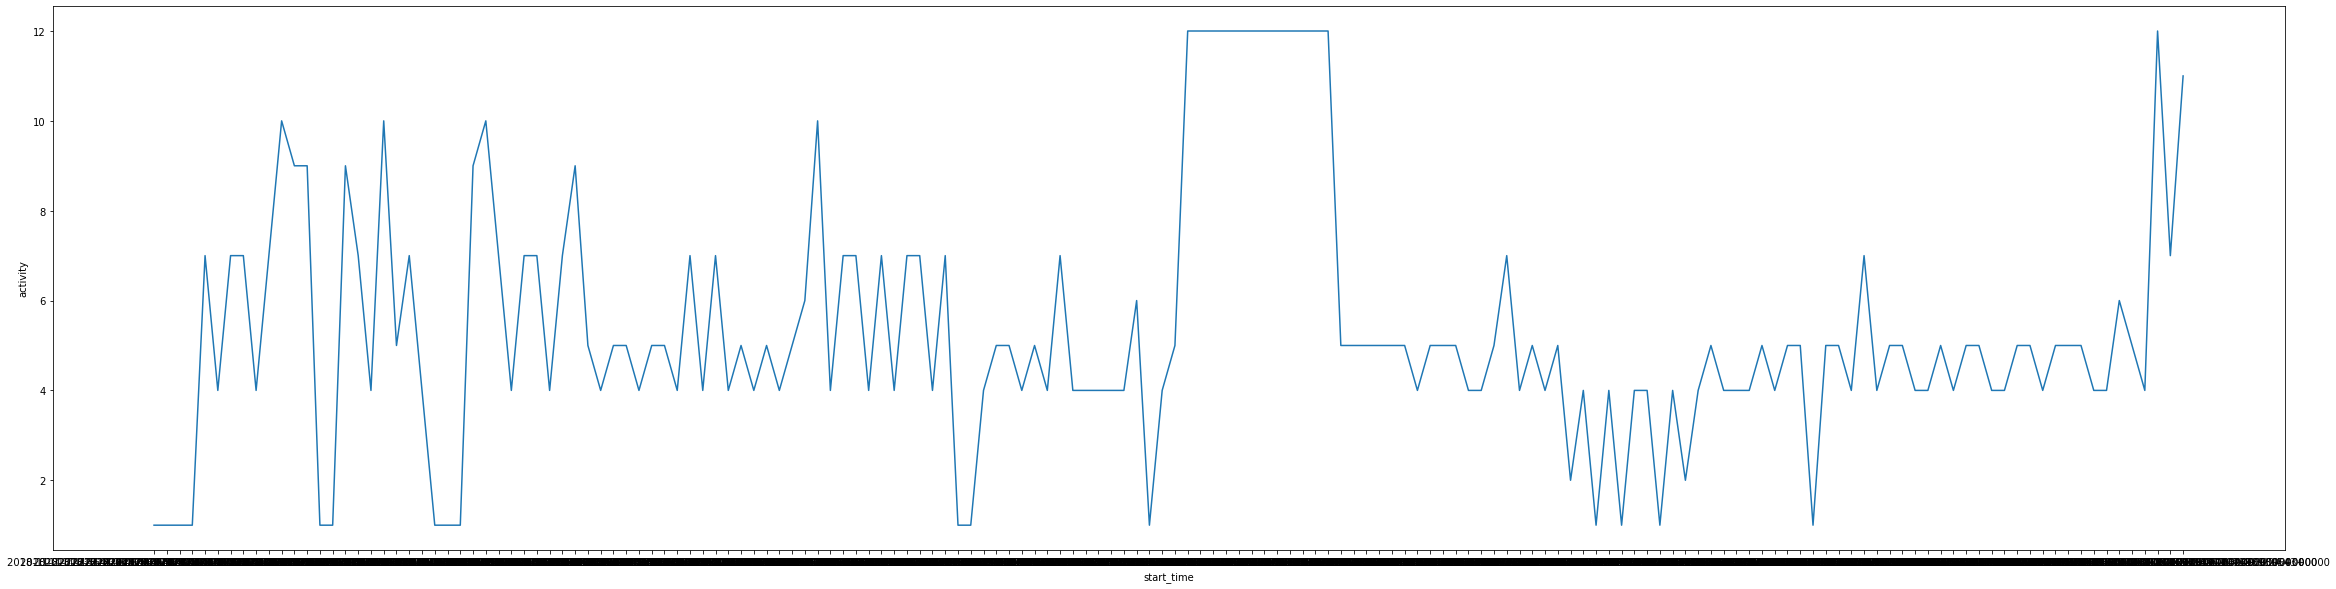

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
plt.plot(train_data.datetimerange,train_data.activity_type_id)
plt.xlabel('start_time')
plt.ylabel('activity')



In [17]:
#user_4_raw['label']=''
#for i in np.arange(len(user_4_raw)):
#  for j in np.arange(len(train_data)):
#    if (user_4_raw.loc[i,'datetime']>=train_data.loc[j,'start'])&(user_4_raw.loc[i,'datetime']<=train_data.loc[j,'finish']):
 #                                                                 user_4_raw.loc[i,'activity_label']=train_data.loc[j,'activity_type_id']
 #    else: continue
#user_4_raw
                    

In [18]:

#for i in range(len(train_data)):
  #user_4_raw.loc[(train_data.start[i] <= user_4_raw['datetime']) & (train_data.finish[i] >= user_4_raw['datetime']), 'label' ] = train_data.activity_type_id[i]
#user_4_raw

In [19]:
#user_4_raw['label'] = ''
#user_4_raw['starting'] = ''
#user_4_raw['finishing'] = ''
for _, row in train_data.iterrows():
  user_1 = user_4_raw[((user_4_raw['datetime'] >= row['start']) & (user_4_raw['datetime'] <= row['finish']))]
  user_4_raw.loc[ user_1.index ,'label'] = row['activity_type_id']
  user_4_raw.loc[ user_1.index , 'starting'] = row['start']
  user_4_raw.loc[ user_1.index , 'finishing'] = row['finish']

In [20]:
user_4_labeled=user_4_raw.dropna()
user_4_labeled

,user_id,datetime,x,y,z,label,starting,finishing
35999,4,2018-12-02 01:27:37.041000+00:00,-2.221,7.776,6.366,5.0,2018-12-02 01:27:37+00:00,2018-12-02 01:28:22+00:00
36000,4,2018-12-02 01:27:37.241000+00:00,1.455,7.125,5.890,5.0,2018-12-02 01:27:37+00:00,2018-12-02 01:28:22+00:00
36001,4,2018-12-02 01:27:37.246000+00:00,1.455,7.125,5.890,5.0,2018-12-02 01:27:37+00:00,2018-12-02 01:28:22+00:00
36002,4,2018-12-02 01:27:37.440000+00:00,0.574,6.205,6.653,5.0,2018-12-02 01:27:37+00:00,2018-12-02 01:28:22+00:00
36003,4,2018-12-02 01:27:37.642000+00:00,2.260,5.171,7.721,5.0,2018-12-02 01:27:37+00:00,2018-12-02 01:28:22+00:00
...,...,...,...,...,...,...,...,...
8051625,4,2018-12-31 13:31:57.361000+00:00,0.919,4.597,8.720,4.0,2018-12-31 11:48:04+00:00,2018-12-31 13:31:58+00:00
8051626,4,2018-12-31 13:31:57.544000+00:00,-0.766,5.631,8.656,4.0,2018-12-31 11:48:04+00:00,2018-12-31 13:31:58+00:00
8051627,4,2018-12-31 13:31:57.746000+00:00,0.957,4.980,8.521,4.0,2018-12-31 11:48:04+00:00,2018-12-31 13:31:58+00:00
8051628,4,2018-12-31 13:31:57.752000+00:00,0.957,4.980,8.521,4.0,2018-12-31 11:48:04+00:00,2018-12-31 13:31:58+00:00


In [21]:
import pickle
file=open('/content/drive/My Drive/Purnata/use_label.pkl','wb')
pickle.dump(user_4_labeled,file)
      
file.close()
                   